In [1]:
# standard data imports 
import numpy as np 
import pandas as pd 
from pandas import Series, DataFrame

# visualizations 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

# statistics 
import pylab
from pylab import rcParams 
import statsmodels.api as sm
import statistics
from scipy import stats 
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# scikit-learn
import sklearn
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
# pathway to csv 
file = 'Desktop/medical_clean.csv'

# to search for missing values 
missing_values = ['N/A', 'NA', 'None', 'n/a', 'na', '-', '.', ' ']

# load data into Pandas dataframe 
df = pd.read_csv(file, index_col=[0], na_values = missing_values)

In [3]:
# name of columns
df.columns

Index(['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip',
       'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children',
       'Age', 'Income', 'Marital', 'Gender', 'ReAdmis', 'VitD_levels',
       'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink',
       'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Services', 'Initial_days', 'TotalCharge', 'Additional_charges',
       'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [4]:
# rename columns Item1 - Item 8 based off Data Dictionary
df.rename(columns = {'Item1': 'Timely_admission',
                            'Item2': 'Timely_treatment', 
                            'Item3' : 'Timely_visits', 
                            'Item4' : 'Reliability', 
                            'Item5' : 'Options', 
                            'Item6' : 'Hours_of_treatment', 
                            'Item7' : 'Courteous_staff', 
                            'Item8' : 'Doc_active_listening'}, inplace=True)

In [5]:
# check to see if any columns are duplicated 
df.columns.duplicated().any()

False

In [6]:
# check for missing values based off of list of missing values
df.isna().any()

Customer_id             False
Interaction             False
UID                     False
City                    False
State                   False
County                  False
Zip                     False
Lat                     False
Lng                     False
Population              False
Area                    False
TimeZone                False
Job                     False
Children                False
Age                     False
Income                  False
Marital                 False
Gender                  False
ReAdmis                 False
VitD_levels             False
Doc_visits              False
Full_meals_eaten        False
vitD_supp               False
Soft_drink              False
Initial_admin           False
HighBlood               False
Stroke                  False
Complication_risk       False
Overweight              False
Arthritis               False
Diabetes                False
Hyperlipidemia          False
BackPain                False
Anxiety   

In [7]:
# look at sum of unique values for each columns 
df.nunique(axis=0)

Customer_id             10000
Interaction             10000
UID                     10000
City                     6072
State                      52
County                   1607
Zip                      8612
Lat                      8588
Lng                      8725
Population               5951
Area                        3
TimeZone                   26
Job                       639
Children                   11
Age                        72
Income                   9993
Marital                     5
Gender                      3
ReAdmis                     2
VitD_levels              9976
Doc_visits                  9
Full_meals_eaten            8
vitD_supp                   6
Soft_drink                  2
Initial_admin               3
HighBlood                   2
Stroke                      2
Complication_risk           3
Overweight                  2
Arthritis                   2
Diabetes                    2
Hyperlipidemia              2
BackPain                    2
Anxiety   

In [8]:
# remove less meaningful data -> high cardinality / not including charges and vitamin d levels 
to_drop = ['Customer_id', 'UID', 'Interaction', 'Zip', 'Lat', 'Lng', 'Zip', 'Population',
          'City', 'State', 'County', 'TimeZone', 'Job', 'Area', 'Timely_admission', 'Timely_treatment',
          'Timely_visits', 'Reliability', 'Options','Hours_of_treatment', 'Courteous_staff', 'Doc_active_listening']
df = df.drop(columns = to_drop)

Children                  AxesSubplot(0.125,0.77;0.227941x0.11)
Age                    AxesSubplot(0.398529,0.77;0.227941x0.11)
Income                 AxesSubplot(0.672059,0.77;0.227941x0.11)
VitD_levels              AxesSubplot(0.125,0.638;0.227941x0.11)
Doc_visits            AxesSubplot(0.398529,0.638;0.227941x0.11)
Full_meals_eaten      AxesSubplot(0.672059,0.638;0.227941x0.11)
vitD_supp                AxesSubplot(0.125,0.506;0.227941x0.11)
Initial_days          AxesSubplot(0.398529,0.506;0.227941x0.11)
TotalCharge           AxesSubplot(0.672059,0.506;0.227941x0.11)
Additional_charges       AxesSubplot(0.125,0.374;0.227941x0.11)
dtype: object

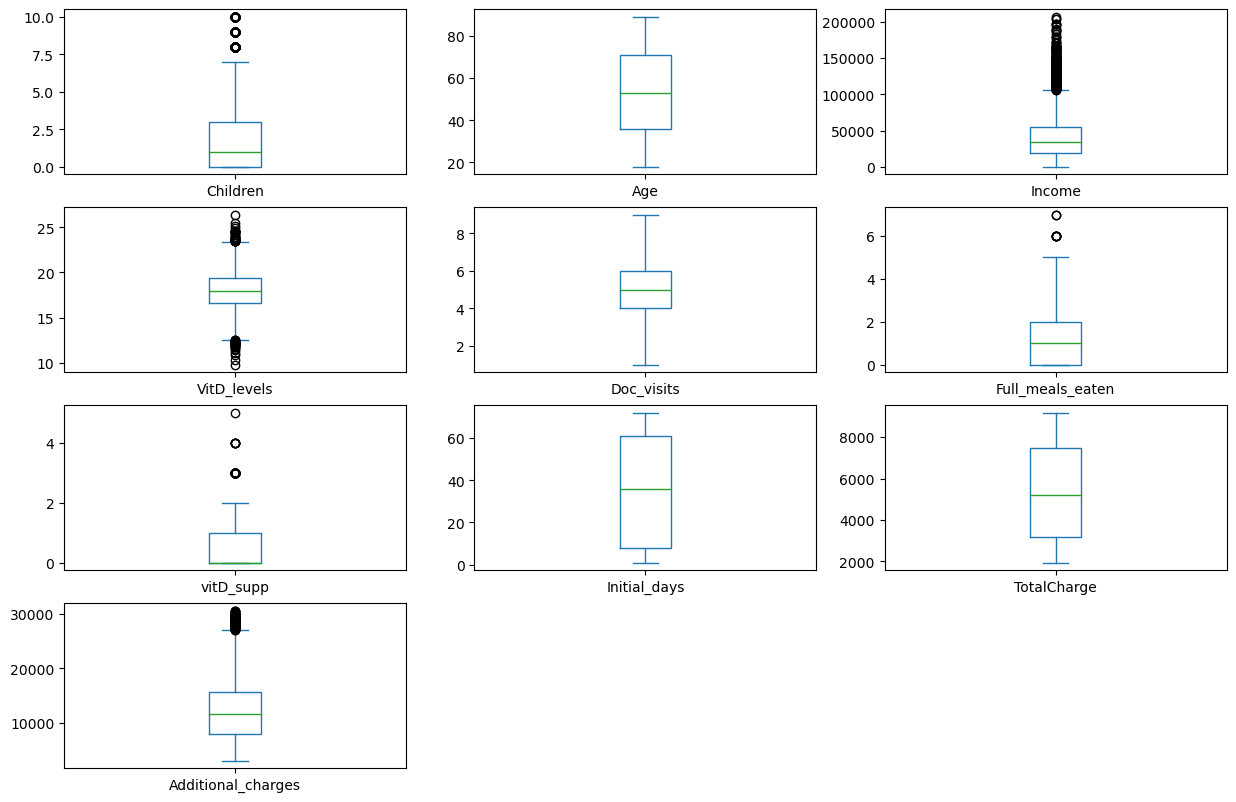

In [9]:
# check for outliers for entire data 
df.plot(kind="box", subplots=True, layout=(6,3), figsize=(15,15))

In [10]:
# outliers include -> children, Income, VitD_levels, Additional_charges vitD_supp, Full_meals_eaten

# lets look for outliers based off IQR method 
# locate values in that column and remove any above or below limits 
# sum of null values 
# prints the results 
# Removing the outliers
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
 
    print("IQR value for column %s is: %s" % (col, IQR))
    
    global outlier_free_list
    global filtered_data
 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]
   
 
for i in df.select_dtypes(exclude=['object']).columns:
    if i == df.columns[0]:
        removeOutliers(df, i)
    else:
        removeOutliers(filtered_data, i)
 
  
# Assigning filtered data back to our original variable
df = filtered_data

print("\n\nShape of data after outlier removal is: ", df.shape)

df.info()

IQR value for column Children is: 3.0
IQR value for column Age is: 35.0
IQR value for column Income is: 34731.47
IQR value for column VitD_levels is: 2.7174015150000024
IQR value for column Doc_visits is: 2.0
IQR value for column Full_meals_eaten is: 2.0
IQR value for column vitD_supp is: 1.0
IQR value for column Initial_days is: 53.3192820625
IQR value for column TotalCharge is: 4285.336122
IQR value for column Additional_charges is: 7672.91069


Shape of data after outlier removal is:  (8745, 28)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8745 entries, 1 to 9999
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Children            8745 non-null   int64  
 1   Age                 8745 non-null   int64  
 2   Income              8745 non-null   float64
 3   Marital             8745 non-null   object 
 4   Gender              8745 non-null   object 
 5   ReAdmis             8745 non-null   objec

In [11]:
# separate nominal and continuous values 
categories = df.select_dtypes(include=object)
numeric = df.select_dtypes(include='number')

In [12]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Children,8745.0,1.82,1.71,0.00,0.00,1.00,3.00,7.00
Age,8745.0,52.06,19.95,18.00,35.00,52.00,69.00,89.00
Income,8745.0,37431.91,23362.32,300.79,19146.93,32608.84,51559.03,106220.50
VitD_levels,8745.0,17.95,1.96,12.56,16.64,17.94,19.32,23.36
Doc_visits,8745.0,5.01,1.04,2.00,4.00,5.00,6.00,8.00
Full_meals_eaten,8745.0,0.99,0.98,0.00,0.00,1.00,2.00,4.00
vitD_supp,8745.0,0.38,0.58,0.00,0.00,0.00,1.00,2.00
Initial_days,8745.0,34.50,26.30,1.00,7.95,35.57,61.21,71.98
TotalCharge,8745.0,5309.76,2177.84,1938.31,3181.47,5199.70,7456.98,9180.73
Additional_charges,8745.0,12239.90,5827.85,3125.70,7799.59,11270.39,14811.06,27123.37


In [13]:
df.describe(include='object').T

,count,unique,top,freq
Marital,8745,5,Widowed,1800
Gender,8745,3,Female,4406
ReAdmis,8745,2,No,5522
Soft_drink,8745,2,No,6496
Initial_admin,8745,3,Emergency Admission,4413
HighBlood,8745,2,No,5399
Stroke,8745,2,No,7014
Complication_risk,8745,3,Medium,3997
Overweight,8745,2,Yes,6204
Arthritis,8745,2,No,5598


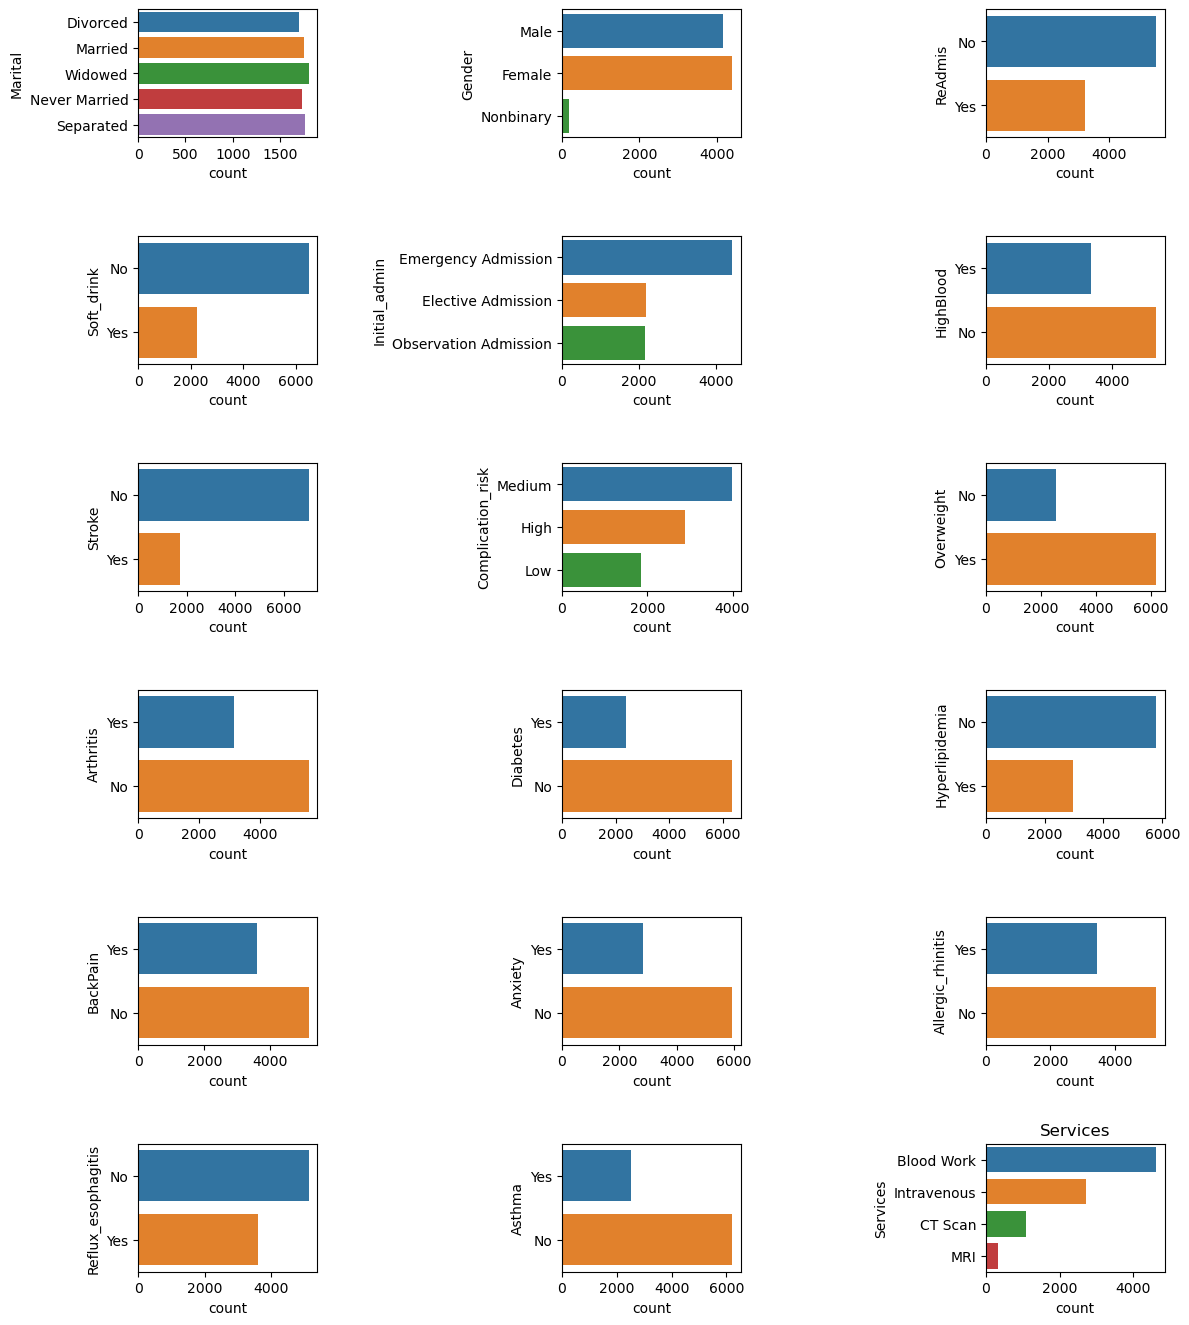

In [14]:
# create bargraph for all categories 
fig = plt.figure(figsize = (12,22))
for i, c in enumerate(categories):
    plt.subplot(10,3,i+1)
    ax = sns.countplot(y = c, data = df)
    fig.tight_layout(h_pad=4, w_pad=4)
    
plt.title(c)
plt.show()

<Figure size 1000x2000 with 0 Axes>

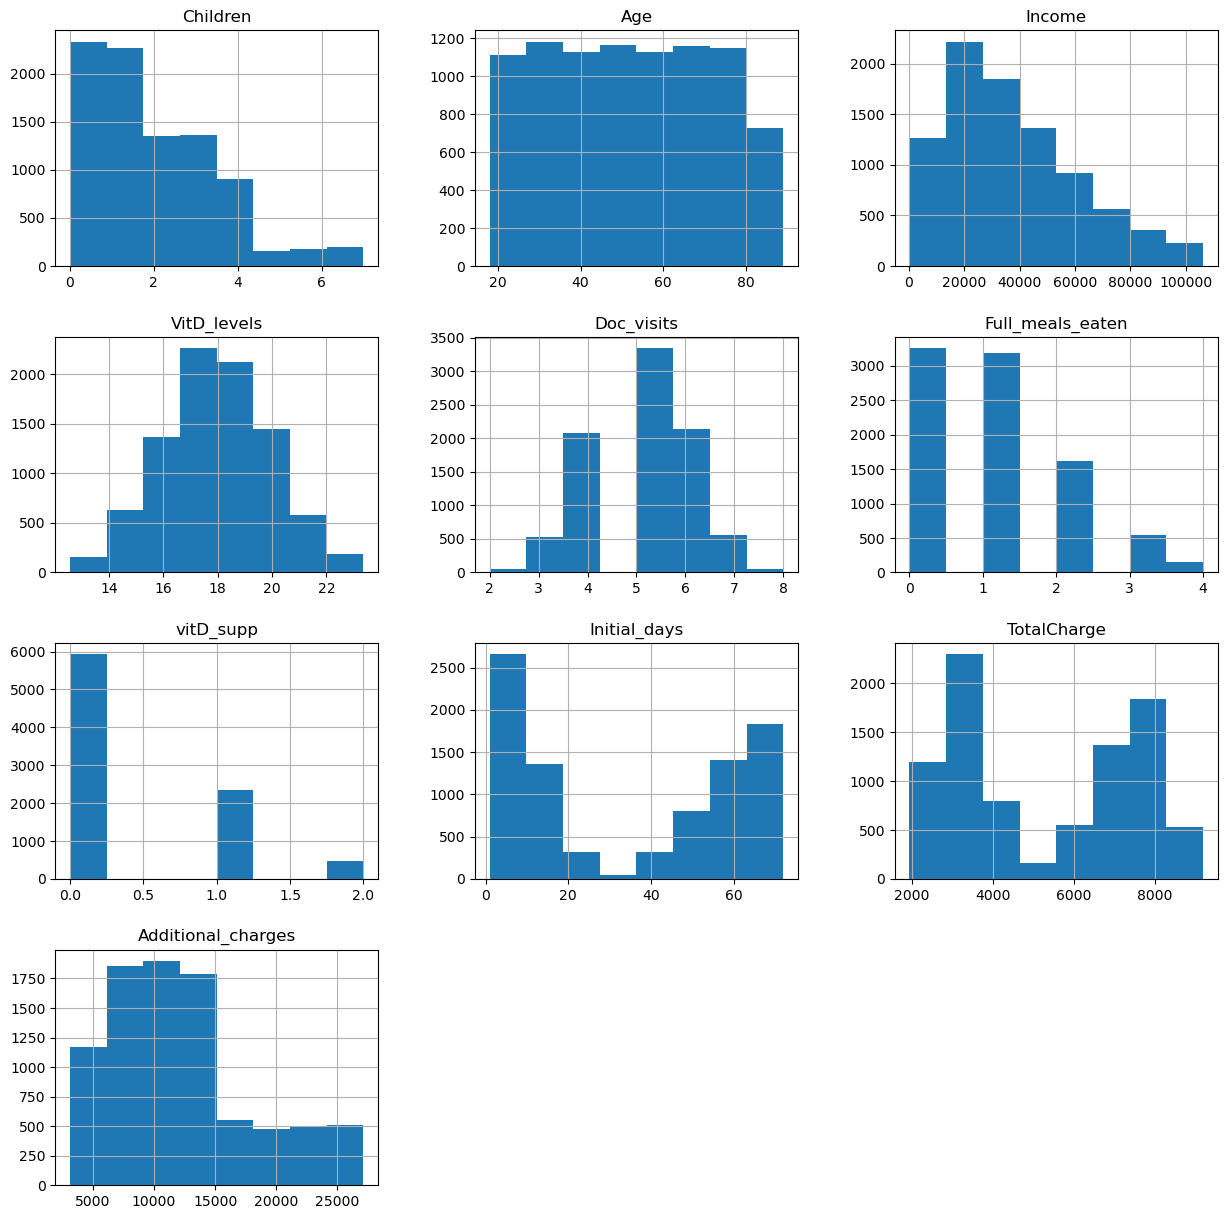

In [15]:
# graphs for numeric 
fig = plt.figure(figsize=(10, 20))
ax = numeric.hist(bins = 8, figsize=(15,15))
plt.title('Numeric Data')
fig.tight_layout(h_pad=5, w_pad=5)
plt.show()

In [16]:
# print category columns to turn into dummies 
print(categories.columns)

Index(['Marital', 'Gender', 'ReAdmis', 'Soft_drink', 'Initial_admin',
       'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis',
       'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services'],
      dtype='object')


In [17]:
# convert categories to numeric 
# drop first means to only have Yes column. 1 = yes 0 = no 
dummies = pd.get_dummies(df[['Marital', 'Gender', 'ReAdmis', 'Soft_drink', 'Initial_admin',
       'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis',
       'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services']], drop_first=True)

# drop original columns and replace with dummy values 
df = pd.concat([df.drop(['Marital', 'Gender', 'ReAdmis', 'Soft_drink', 'Initial_admin',
       'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis',
       'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services'],axis=1), dummies],axis=1)

In [18]:
# move cleaned data to csv 
df.to_csv('Desktop/Clean_data_D208.csv')

<AxesSubplot:>

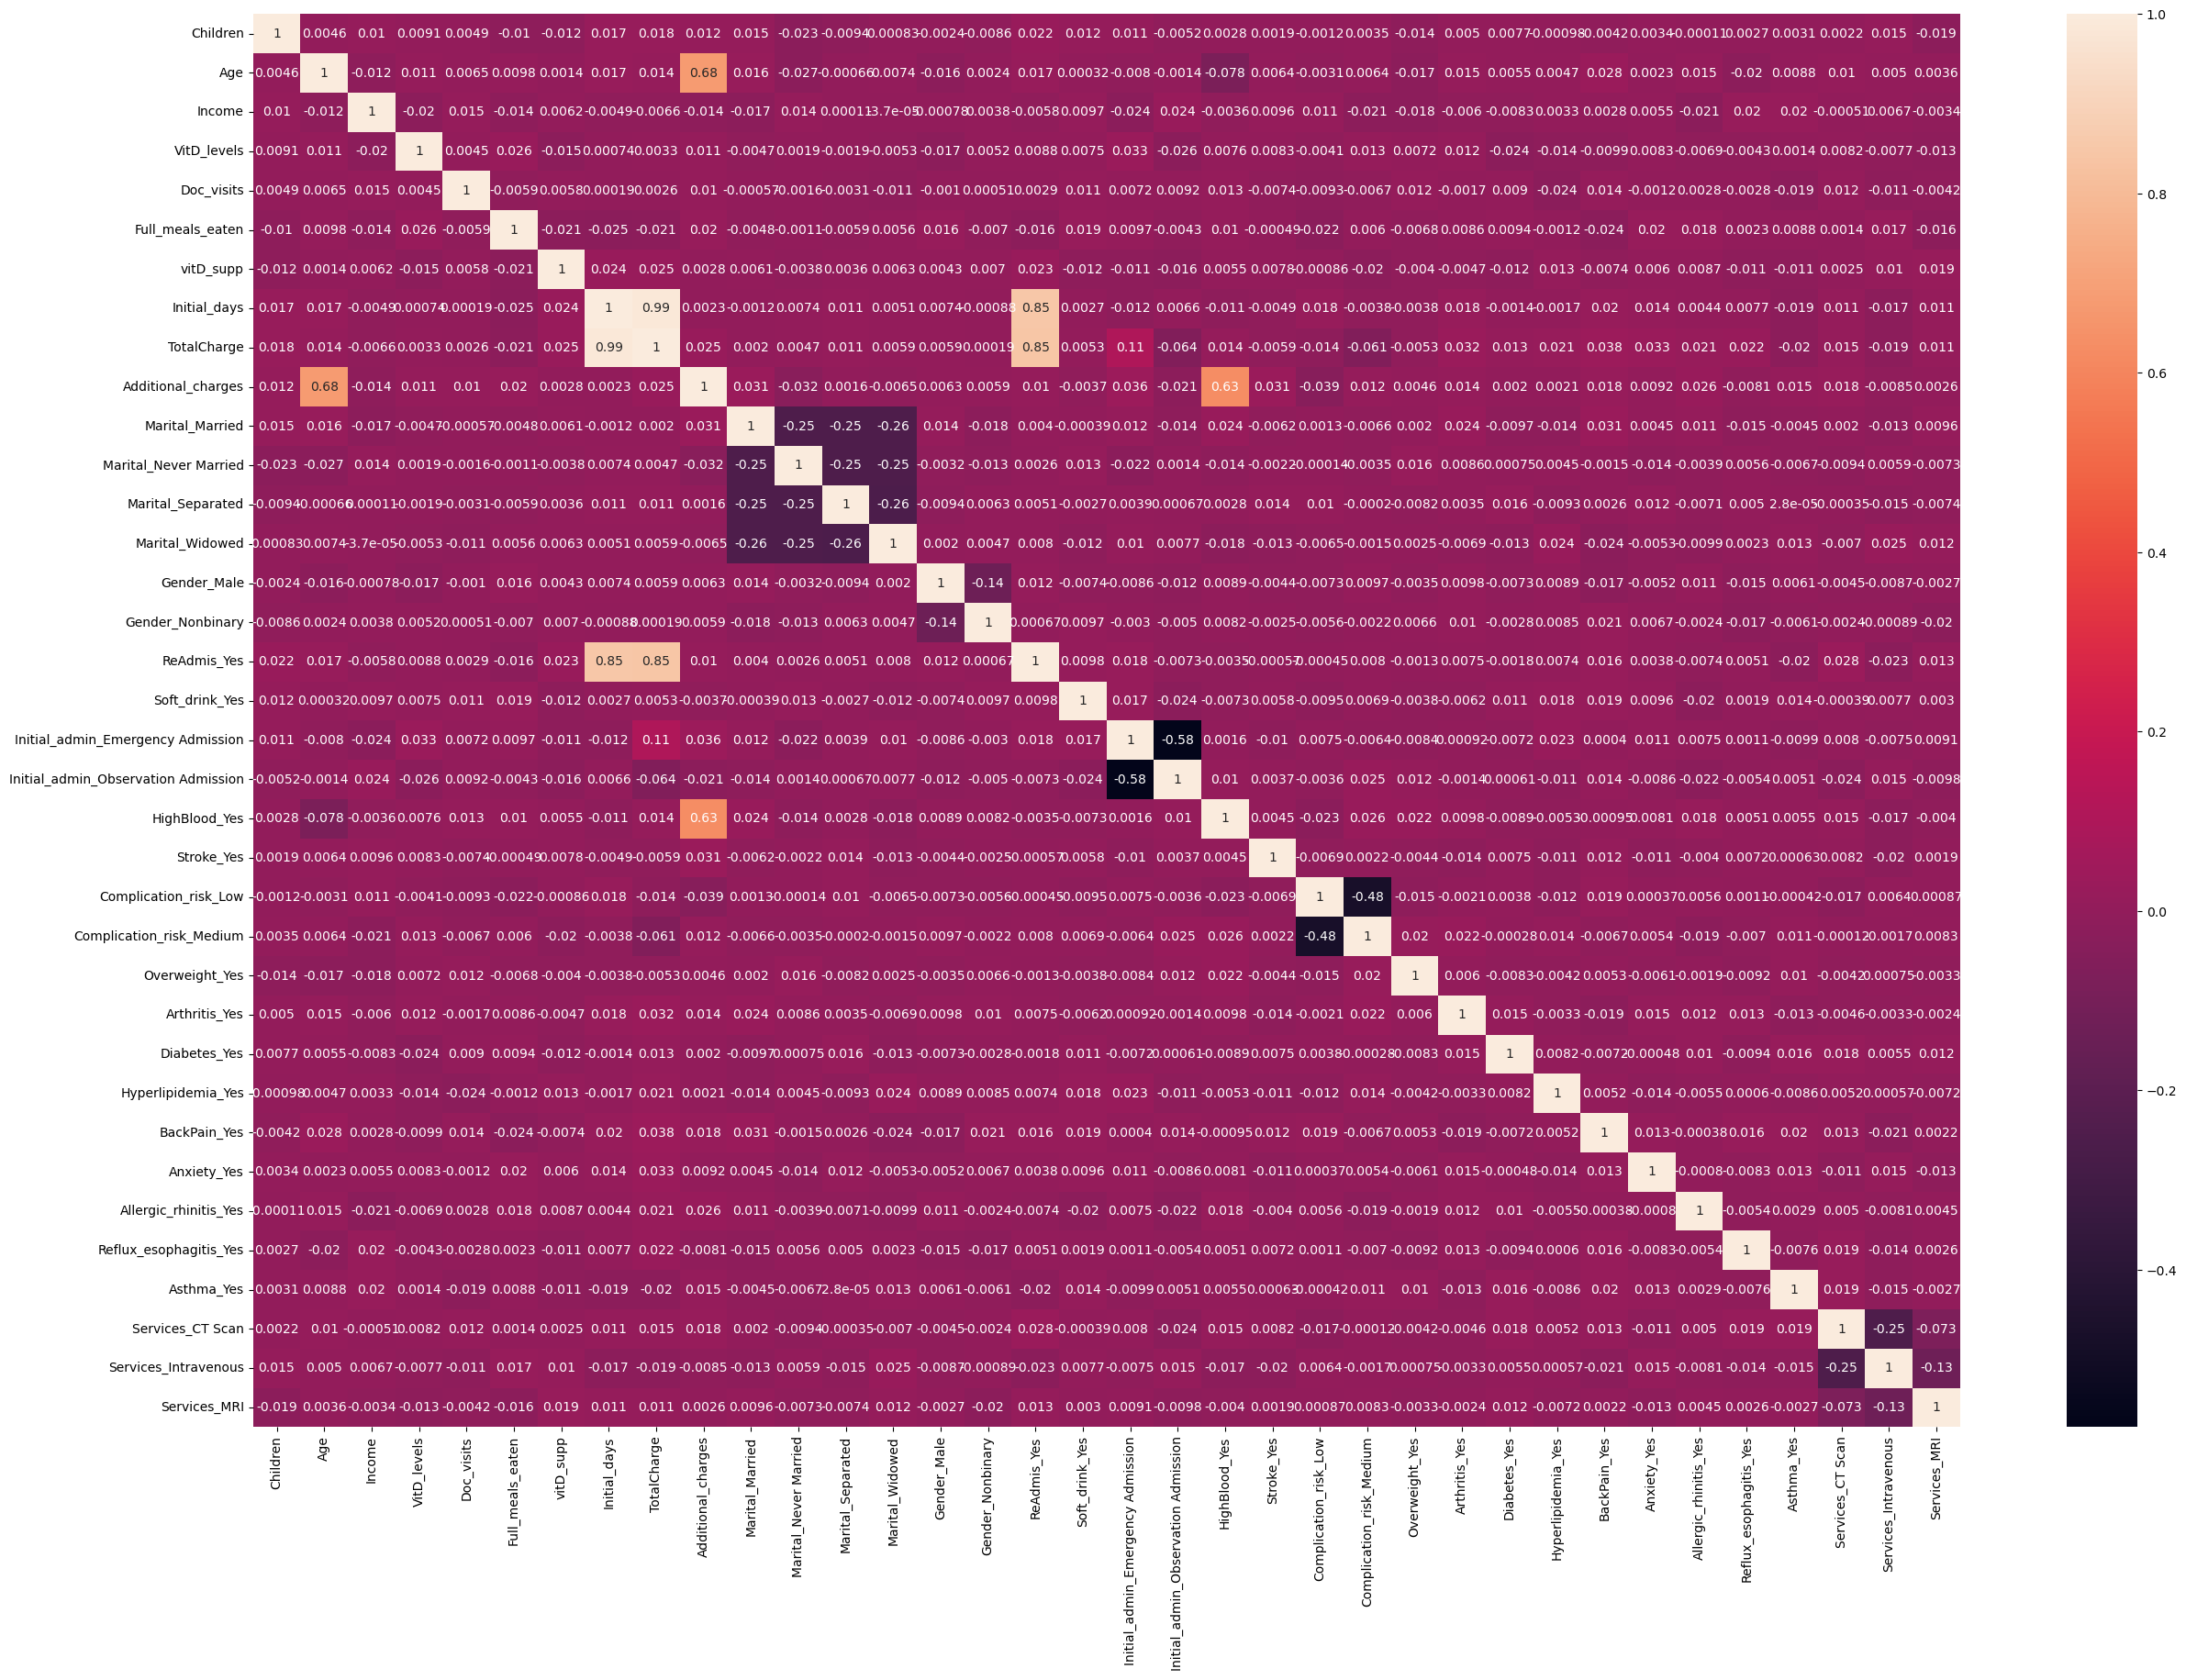

In [19]:
# heatmap of all data, just to get an idea of correlation 
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='TotalCharge', ylabel='Initial_days'>

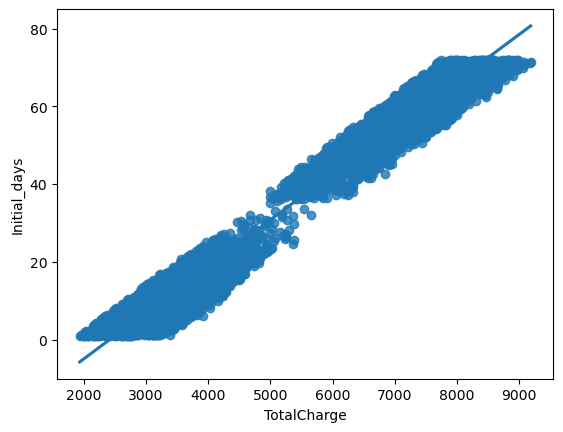

In [20]:
# bivariate of totalcharge vs. initial days 
sns.regplot(x='TotalCharge', y='Initial_days', data = df, ci=None)

<AxesSubplot:xlabel='ReAdmis_Yes', ylabel='Initial_days'>

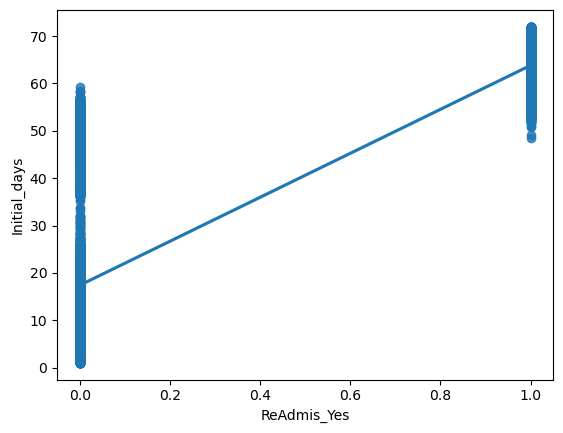

In [21]:
# bivariate readmis vs days 
sns.regplot(x='ReAdmis_Yes', y='Initial_days', data = df, ci=None)

<AxesSubplot:xlabel='Additional_charges', ylabel='Initial_days'>

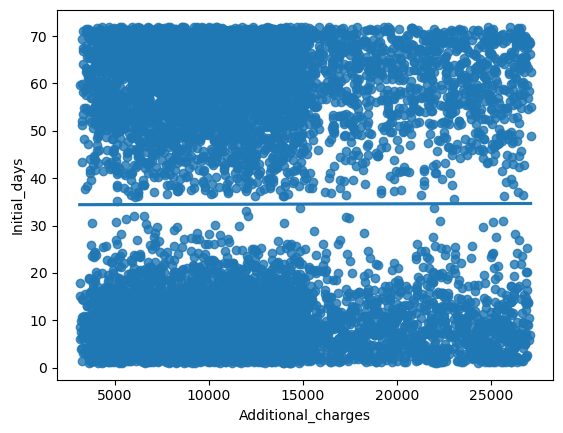

In [22]:
# bivariate additional charges vs days 
sns.regplot(x='Additional_charges', y='Initial_days', data = df, ci=None)

In [23]:
# start the regression model 
#create a constant/intercept/starting point when all predictors are at 0
df['intercept'] = 1

# our target is Initaldays 
target = ['Initial_days']

# y = iniital days, our response variable 
y = df['Initial_days']

# all X variable, or predictors, is everything except initial days 
X = df.drop(columns=target)

In [24]:
# check VIF 

vif_data = pd.DataFrame()

# the datas columns 
vif_data['feature'] = X.columns

# the correlation in entire dataset 
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

# if VIF is 10 or above, remove 
print(vif_data)

                                feature         VIF
0                              Children    1.003773
1                                   Age    9.119166
2                                Income    1.004690
3                           VitD_levels    1.005291
4                            Doc_visits    1.003553
5                      Full_meals_eaten    1.005927
6                             vitD_supp    1.004802
7                           TotalCharge    3.759794
8                    Additional_charges   15.120468
9                       Marital_Married    1.634935
10                Marital_Never Married    1.628761
11                    Marital_Separated    1.632876
12                      Marital_Widowed    1.643890
13                          Gender_Male    1.024653
14                     Gender_Nonbinary    1.022231
15                          ReAdmis_Yes    3.680941
16                       Soft_drink_Yes    1.003905
17    Initial_admin_Emergency Admission    1.554671
18  Initial_

In [25]:
v_too_high = ['Age', 'Additional_charges']

X = X.drop(columns=v_too_high)

In [26]:
# regression model. initial_days (y), being tested against dataset (X) and fitted 
model = sm.OLS(y, X).fit()

# matrix is printed to show statistical values 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.805e+16
Date:                Mon, 05 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:48:51   Log-Likelihood:                 98291.
No. Observations:                8745   AIC:                        -1.965e+05
Df Residuals:                    8711   BIC:                        -1.963e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Ch

In [27]:
# looking at p-value ([4]), if above 0.05 it doesnt effect initial_days 
p_too_high = ['Children', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
               'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Male',
              'Gender_Nonbinary', 'ReAdmis_Yes', 'Soft_drink_Yes', 'Initial_admin_Observation Admission', 'Stroke_Yes', 'Overweight_Yes',
              'Asthma_Yes', 'Services_CT Scan', 'Services_Intravenous', 'Services_MRI']

# drop the predictors with a pvalue higher than 0.05
X = X.drop(columns=p_too_high)


In [28]:
# run regression again, with less values 
reduction_model = sm.OLS(y, X).fit()
print(reduction_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.969e+16
Date:                Mon, 05 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:48:51   Log-Likelihood:                 98285.
No. Observations:                8745   AIC:                        -1.965e+05
Df Residuals:                    8732   BIC:                        -1.965e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
TotalC

In [29]:
# create a predicted dataset, based off regression model 
predicted = reduction_model.predict(df[['TotalCharge', 'Initial_admin_Emergency Admission',
                                                                       'HighBlood_Yes', 'Complication_risk_Low',
                                                                       'Complication_risk_Medium','Arthritis_Yes',
                                                                       'Diabetes_Yes','Hyperlipidemia_Yes',
                                                                       'BackPain_Yes','Anxiety_Yes','Allergic_rhinitis_Yes',
                                                                       'Reflux_esophagitis_Yes', 'intercept']])

In [30]:
# Residual Standard error, meaning the percentage of incorrect variance 
reduction_model.resid.std(ddof=X.shape[1])*100

0.00031846762812826366

In [31]:
# create a table proving the R2 is actually 100% 
test = pd.DataFrame({'Predicted Y Value' : predicted, 'Actual Y Value': y})
print(test)

           Predicted Y Value  Actual Y Value
CaseOrder                                   
1                  10.585770       10.585770
2                  15.129562       15.129562
3                   4.772177        4.772177
4                   1.714879        1.714879
5                   1.254807        1.254807
...                      ...             ...
9993               56.615707       56.615710
9995               37.932118       37.932120
9996               51.561221       51.561220
9998               70.154181       70.154180
9999               63.356904       63.356900

[8745 rows x 2 columns]


Text(0, 0.5, 'Residuals')

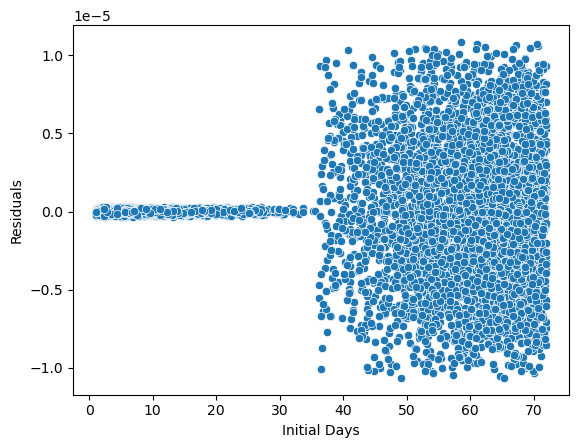

In [32]:
# residual plot 
# residuals is the original Y against the predicted 
residuals = df['Initial_days'] - predicted
sns.scatterplot(x=df['Initial_days'],y=residuals)
plt.xlabel('Initial Days')
plt.ylabel('Residuals')

eval_env: 1


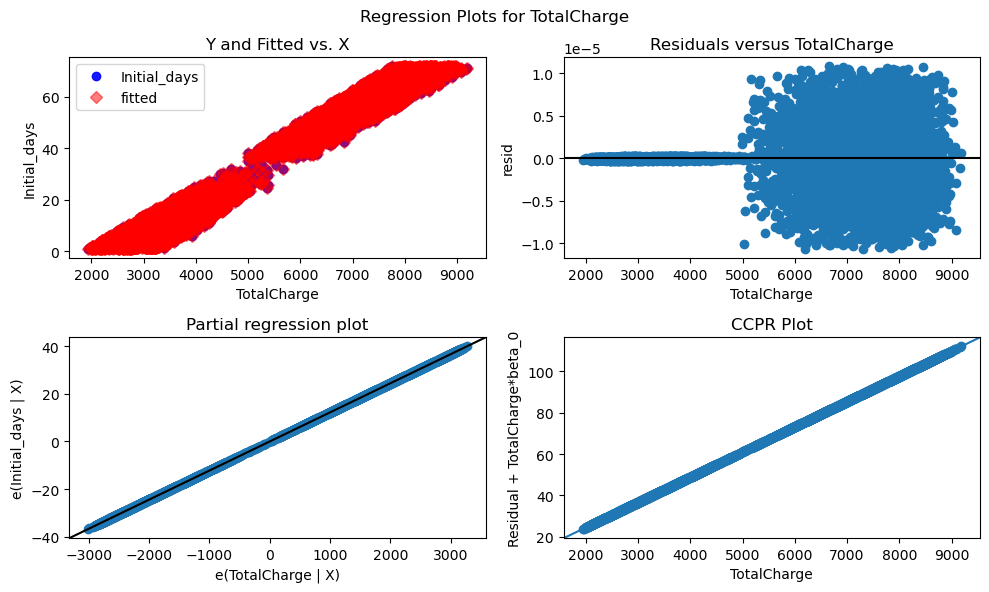

In [33]:
# more indepth residual plot for all high coefficients 
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(reduction_model, 'TotalCharge', fig=fig)

eval_env: 1


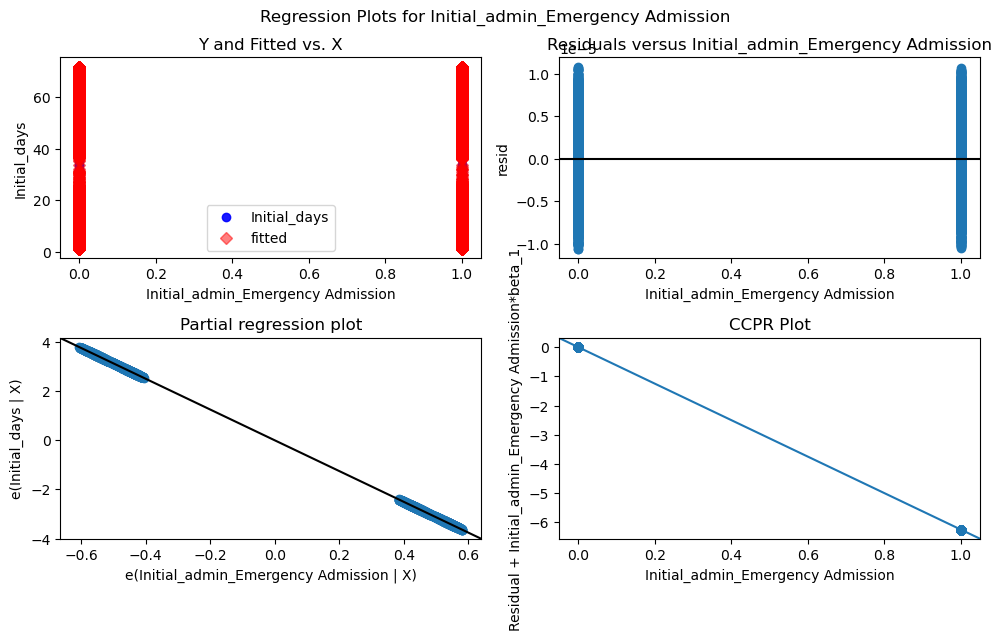

In [34]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(reduction_model, 'Initial_admin_Emergency Admission', fig=fig)

eval_env: 1


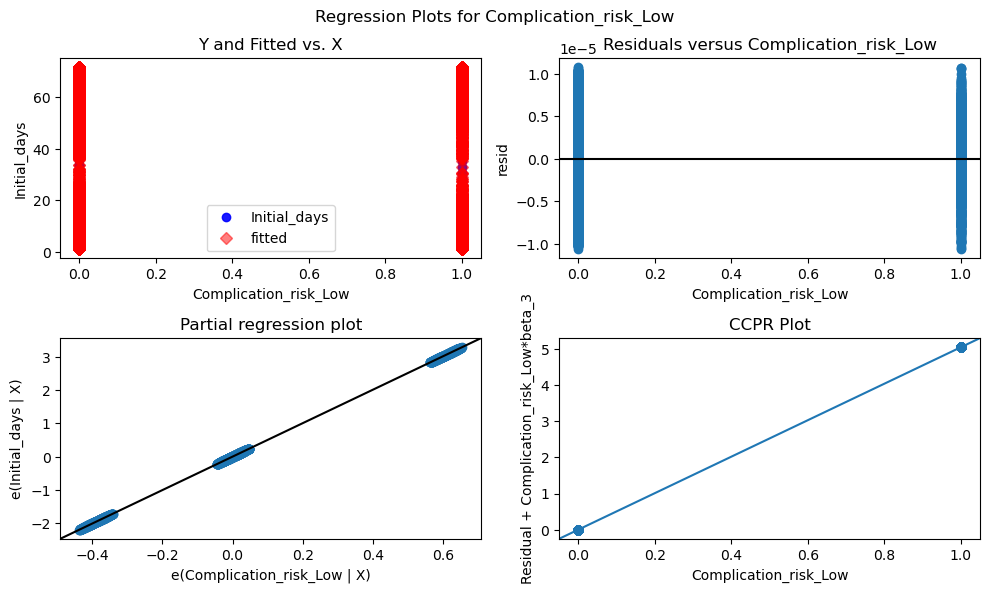

In [35]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(reduction_model, 'Complication_risk_Low', fig=fig)

eval_env: 1


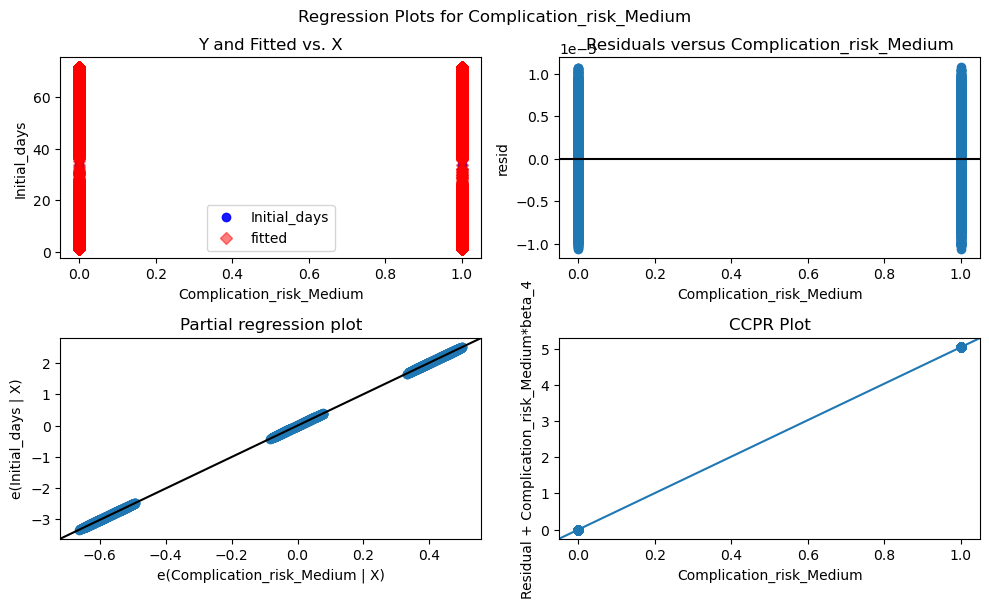

In [36]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(reduction_model, 'Complication_risk_Medium', fig=fig)